In [1]:
import otter
grader = otter.Notebook()

# Homework 3: Table Manipulation and Visualization

**Reading**: 
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import otter
grader = otter.Notebook()


## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

<!--
BEGIN QUESTION
name: q1_1
-->

In [3]:
unemployment = Table().read_table('unemployment.csv')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

<!--
BEGIN QUESTION
name: q1_2
-->

In [5]:
by_nei = unemployment.sort('NEI', descending = True)
by_nei_pter = unemployment.sort('NEI-PTER', descending = True)

In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 3.** Use `take` to make a table containing the data for the 11 quarters when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter.

<!--
BEGIN QUESTION
name: q1_3
-->

In [7]:
greatest_nei = by_nei.take(np.arange(0, 11))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

<!--
BEGIN QUESTION
name: q1_4
-->

In [9]:
pter = unemployment.select('NEI-PTER')[0] - unemployment.select('NEI')[0]
pter

array([ 1.0746,  1.1644,  1.1555,  1.129 ,  1.2139,  1.0757,  1.1282,
        1.1114,  1.0529,  1.0744,  1.1004,  1.0747,  1.0705,  1.0455,
        1.008 ,  0.9734,  0.9753,  0.8931,  0.9451,  0.8367,  0.8208,
        0.8105,  0.8248,  0.7578,  0.7251,  0.7445,  0.7543,  0.7423,
        0.7399,  0.7687,  0.8418,  0.9923,  0.9181,  0.9629,  0.9703,
        0.9575,  1.0333,  1.0781,  1.0675,  1.0354,  1.0601,  1.01  ,
        1.0042,  1.0368,  0.9704,  0.923 ,  0.9759,  0.93  ,  0.889 ,
        0.821 ,  0.9409,  0.955 ,  0.898 ,  0.8948,  0.9523,  0.9579,
        1.0149,  1.0762,  1.2873,  1.4335,  1.7446,  1.8415,  1.9315,
        1.8859,  1.8257,  1.9067,  1.8376,  1.8473,  1.7993,  1.8061,
        1.7651,  1.7927,  1.7286,  1.6387,  1.6808,  1.6805,  1.6629,
        1.6253,  1.6477,  1.6298,  1.4796,  1.5131,  1.4866,  1.4345,
        1.3675,  1.3097,  1.2319,  1.1735,  1.1844,  1.1746])

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

<!--
BEGIN QUESTION
name: q1_5
-->

In [11]:
by_pter = unemployment.with_columns('PTER', pter).sort('PTER', descending = True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 6.** 

Create a line plot of the PTER over time. 

To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

The order of the columns matter for our correctness tests, so be sure `Year` comes before `PTER`.

*Note:* When constructing `pter_over_time`, do not just add the `year` column to the `by_pter` table. Please follow the directions in the question above.
<!--
BEGIN QUESTION
name: q1_6
-->

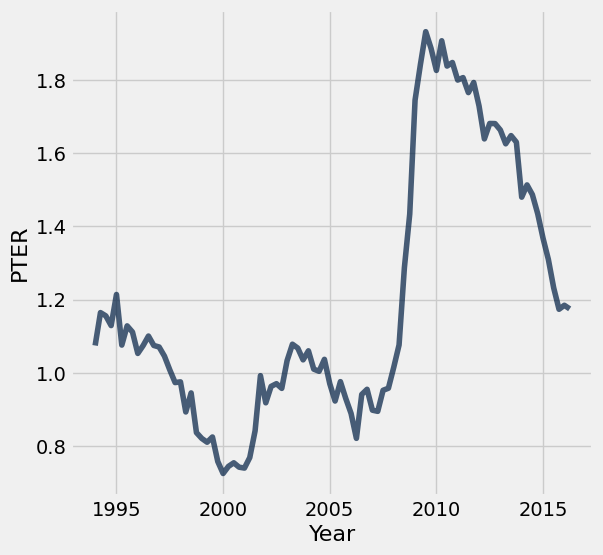

In [13]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns(
        'Year', year,
        'PTER', pter)
pter_over_time.plot('Year', 'PTER')

In [14]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

<!--
BEGIN QUESTION
name: q1_7
-->

In [15]:
highPTER = True

In [16]:
grader.check("q1_7")

q1_7 results: All test cases passed!

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

If you want to read more about the different column descriptions, click [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)!

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [17]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

<!--
BEGIN QUESTION
name: q2_1
-->

In [18]:
us_birth_rate = sum(pop.column('BIRTHS')) /  sum(pop.column('2015'))
us_birth_rate

0.012358536498646102

In [19]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

*Hint*: `migration_rates` should be a table and `movers` should be a number.

<!--
BEGIN QUESTION
name: q2_2
-->

In [20]:
migration_rates = Table().with_columns('NAME', pop.column('NAME'), 'MIGRATION', (abs(pop.column('MIGRATION')) / pop.column('2015')) * 100)
movers = migration_rates.where('MIGRATION', are.above(1)).num_rows
movers

9

In [21]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the `REGION` column, and appropriately filter (i.e. the types must match!).

<!--
BEGIN QUESTION
name: q2_3
-->

In [22]:
west_births = sum(pop.where("REGION", are.equal_to(4)).column('BIRTHS'))
west_births

979657

In [23]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4.** 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.

<!--
BEGIN QUESTION
name: q2_4
-->

In [24]:
visualization = 3

In [25]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 5.** 

In the code cell below, create a visualization (this should be the same type of visualization you identified in the last question) that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here. 

Things to consider:

- What type of chart will help us illustrate an association between 2 variables?
- How can you manipulate a certain table to help generate your chart?
- Check out the Recommended Reading for this homework!

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->
<!-- EXPORT TO PDF -->

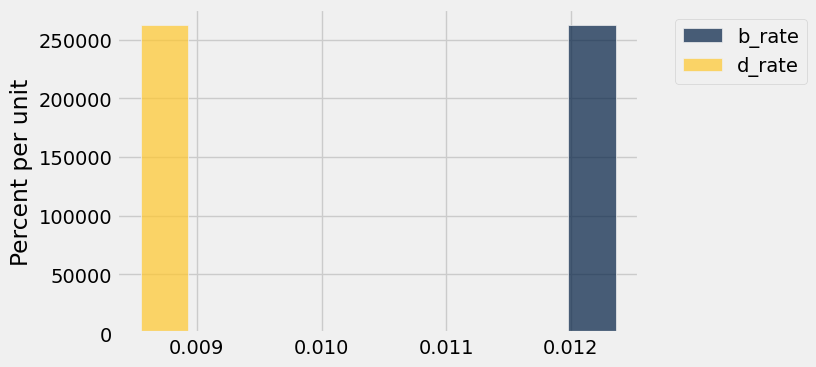

In [26]:
# Generate your chart in this cell
us_death_rate = sum(pop.column('DEATHS')) /  sum(pop.column('2015'))
bd_table = Table().with_columns('b_rate', us_birth_rate, 'd_rate', us_death_rate)

birth_death_relationship = bd_table.hist('b_rate', 'd_rate')

**Question 6.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. *Hint:* Look closely at the visualization you made.  Does it look like there is a relationship between the two variables? 

<!--
BEGIN QUESTION
name: q2_6
-->

In [27]:
assoc = False

In [28]:
grader.check("q2_6")

q2_6 results: All test cases passed!

## 3. Marginal Histograms


Consider the following scatter plot:
![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

**Histogram A:**
![](var1.png)
**Histogram B:**
![](var2.png)

**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [29]:
histogram_column_x = 2

In [30]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 2.** State at least one reason why you chose the histogram from Question 1. Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

Because this is how values are overlayed over x axis. Histogram A represents y axis. 

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? `Assign histogram_column_y` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [31]:
histogram_column_y = 1

In [32]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 4.** State at least one reason why you chose the histogram from Question 3.  Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

Because this is how values are overlayed over y axis. Histogram B represents x axis. 

## 4. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [33]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1.** Produce histograms of all ride times in Boston using the given bins in `equal_bins`. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->
<!-- EXPORT TO PDF -->

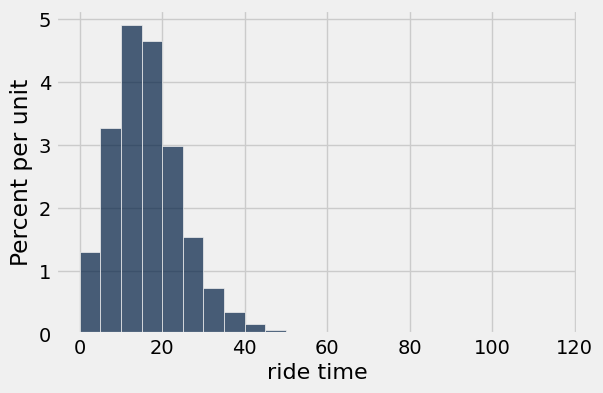

In [34]:
equal_bins = np.arange(0, 120, 5)
hist_plot = boston.hist('ride time', bins = equal_bins)

**Question 2.** Now, produce histograms of all ride times in Manila using the given bins in `equal_bins`.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->
<!-- EXPORT TO PDF -->

(0.0, 0.05)

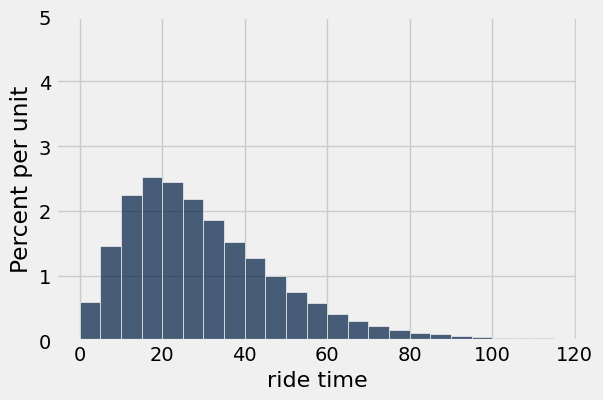

In [35]:
hist_plot = manila.hist('ride time', bins = equal_bins)
# Don't delete the following line!
plots.ylim(0, 0.05)

**Question 3.** Assign `boston_under_10` and `manila_under_10` to the percentage of rides that are less than 10 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should not access the tables `boston` and `manila` in any way.

<!--
BEGIN QUESTION
name: q4_3
manual: false
-->

In [36]:
boston_under_5_height = 1.2
manila_under_5_height = 0.6
boston_5_to_under_10_height = 3.2
manila_5_to_under_10_height = 1.4

boston_under_10 = boston_5_to_under_10_height + boston_under_5_height
manila_under_10 = manila_5_to_under_10_height + manila_under_5_height

In [37]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.** Let's take a closer look at the distribution of ride times in Boston. Assign `boston_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time 

1: 0-8 minutes  
2: 8-14 minutes  
3: 14-20 minutes  
4: 20-40 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [38]:
import statistics as s
boston_median_bin = s.median(boston.column('ride time'))
boston_median_bin = 3
boston_median_bin

3

In [39]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 5.** Identify one difference between the histograms, in terms of the statistical properties. Can you comment on the average and/or skew of each histogram?

*Hint*: The best way to do this is to compare the two histograms (from 3.1 and 3.2) visually.

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->
<!-- EXPORT TO PDF -->

Boston's histogram is much more curved to the left side and its median value is closer to the average of the curve. 

**Question 6.** Why is your solution in Question 6 the case? Based on one of the following two readings, why are the distributions for Boston and Manila different?

- [Boston reading](https://www.climatestotravel.com/climate/united-states/boston)
- [Manila reading](https://manilafyi.com/why-is-manila-traffic-so-bad/)

*Hint:* Try thinking about external factors of the two cities that may be causing the difference! There may be multiple different factors that come into play.

<!--
BEGIN QUESTION
name: q4_6
manual: true
-->
<!-- EXPORT TO PDF -->

It seems like in Boston people tend to go places using Uber - much more likely because of a bad weather conditions.
People don't want to get wet or cold, so they call Uber for short distanced drives. 

On the other hand, Manila seems like a bigger city and/or traffic system probably made not as good as in Boston.  
Drives are taking more time / people are going farther away.

Overall, it seems like Boston's infrastructure made better than Manila's anyways. 
With the road access demand created by the weather, they still have shorter drive times. 

## Congratulations! You're done with Homework 3!

Be sure to run all of the cells and the grader checks and verify that they all pass, then choose **Download as PDF via LaTeX** from the **File** menu, as well as **Download as Notebook** from the **File** menu, correctly name your files, and submit the two files on **canvas**.